# МАДМО

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
Домашнее задание необходимо загрузить в общий репозиторий с именной папкой 


## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [1]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [226]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((300,300))
b = np.random.sample((300,300))
# выведите ранг каждой матрицы с помощью функции np.linalg.rank.
# Используйте функцию shape, что она вывела?
# ========
print(np.linalg.matrix_rank(a))
print(np.linalg.matrix_rank(b))
print(np.shape(a))
# ========
print(a)
print(b)

300
300
(300, 300)
[[ 0.91100656  0.58228488  0.87378125 ...,  0.67445884  0.50044826
   0.16229425]
 [ 0.79687405  0.7236573   0.98474216 ...,  0.32296661  0.79940911
   0.50644985]
 [ 0.17402897  0.11650741  0.72162543 ...,  0.33267357  0.88232473
   0.08863543]
 ..., 
 [ 0.98486087  0.59379538  0.57906838 ...,  0.77312029  0.23678881
   0.3988676 ]
 [ 0.66179695  0.33051903  0.96483547 ...,  0.80395826  0.8383026
   0.79980422]
 [ 0.3753598   0.41965883  0.14576747 ...,  0.47449823  0.99400749
   0.39441988]]
[[ 0.62243739  0.96477807  0.61711501 ...,  0.14318751  0.17601386
   0.57146939]
 [ 0.18868542  0.55897988  0.02714605 ...,  0.68412755  0.66871418
   0.82568868]
 [ 0.79215094  0.98806792  0.21937486 ...,  0.92926771  0.72145121
   0.23646182]
 ..., 
 [ 0.14313797  0.35888827  0.50167244 ...,  0.58840764  0.43930398
   0.26273257]
 [ 0.91595639  0.18751104  0.81238286 ...,  0.4257125   0.02038927
   0.94158113]
 [ 0.27530195  0.43811501  0.87688203 ...,  0.00550733  0.1847101

In [227]:
def mult(a, b):
    
    c=np.zeros((len(a), len(b[1])))
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат 
    for i in range(len(a)):
        for j in range(len(b[1])):
            for k in range(0, len(b)):
                c[i][j] += a[i,k]*b[k, j]
    return c

In [228]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    return a @ b

In [229]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 29.8 s


array([[ 73.23515989,  78.00256617,  73.67571114, ...,  79.51882046,
         73.13885406,  73.19397084],
       [ 68.83602994,  72.66640218,  71.01630334, ...,  76.52374599,
         70.68205226,  71.27379545],
       [ 78.79998095,  79.30879357,  79.21401321, ...,  83.67571089,
         77.32768611,  77.04045865],
       ..., 
       [ 77.39644859,  76.30161841,  73.97514632, ...,  80.70108158,
         77.03812622,  73.38625311],
       [ 77.95014419,  81.59183195,  81.61082182, ...,  86.91578253,
         77.44547643,  78.24649632],
       [ 73.31516136,  75.37915672,  73.70173794, ...,  79.76895464,
         70.88218665,  70.81728861]])

In [230]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 92.3 ms


array([[ 73.23515989,  78.00256617,  73.67571114, ...,  79.51882046,
         73.13885406,  73.19397084],
       [ 68.83602994,  72.66640218,  71.01630334, ...,  76.52374599,
         70.68205226,  71.27379545],
       [ 78.79998095,  79.30879357,  79.21401321, ...,  83.67571089,
         77.32768611,  77.04045865],
       ..., 
       [ 77.39644859,  76.30161841,  73.97514632, ...,  80.70108158,
         77.03812622,  73.38625311],
       [ 77.95014419,  81.59183195,  81.61082182, ...,  86.91578253,
         77.44547643,  78.24649632],
       [ 73.31516136,  75.37915672,  73.70173794, ...,  79.76895464,
         70.88218665,  70.81728861]])

### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [560]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    # Ваш код здесь
    # старый вариант: return np.array([np.mean(A[:i+1]) for i in range(len(A))])
    return np.cumsum(A) / (np.array(range(len(A)))+1)
    pass

In [562]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    cum_sum=0
    for i in range(len(A)):
        cum_sum += A[i]
        S[i]=cum_sum/(i+1)
    return np.array(S)

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 2.53 s
Wall time: 9.09 s


0.0

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все элементы с четными индексами исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [563]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    # Ваш код здесь
    Y = X.copy()
    Y[1::2]=a
    Y[::2]=Y[::2][::-1]**3
    return np.hstack((X, Y))[::-1]

In [567]:
def stupid_transformation(X, a=1):
    Y=np.zeros(2*len(X))
    for i in range(len(X)):
        Y[len(Y)-i-1] = X[i]
    for i in range(len(X)):
        if i % 2 == 1:
            Y[len(Y)-i-1-len(X)] = a
        else:
            if len(X) % 2 == 1:
                Y[len(Y)-i-1-len(X)] = X[len(X)-i-1]**3
            else:
                Y[len(Y)-i-1-len(X)] = X[len(X)-i-2]**3
    return Y

In [568]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 502 ms
Wall time: 15 s


0.0

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Ваш ответ
# Ядро NumPy написано на C, C++, это низкоуровневые языки, которые работают быстрее

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [402]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

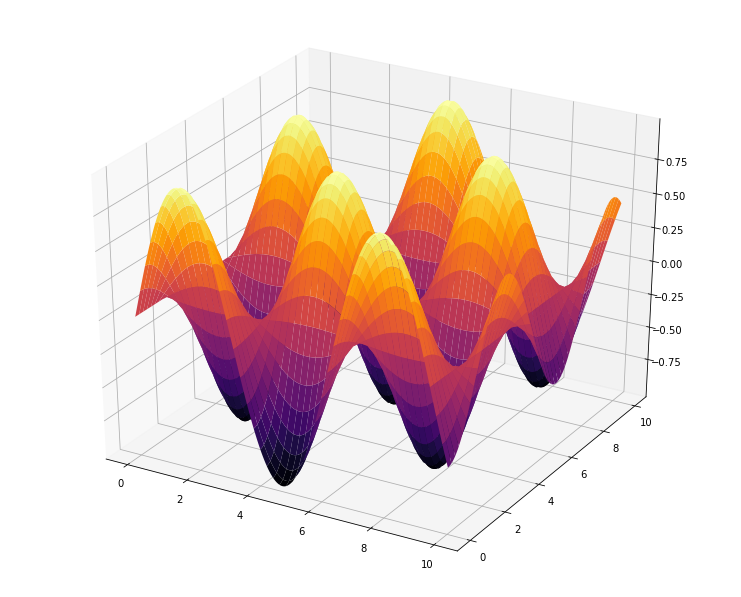

In [417]:
grid_x, grid_y = np.meshgrid(np.linspace(0, 10, 500), np.linspace(0, 10, 500))
draw_f(grid_x, grid_y)

### Задача 5*

Выберите любую картинку и загрузите ее в папку с кодом. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [570]:
from matplotlib import pyplot as plt
%matplotlib inline

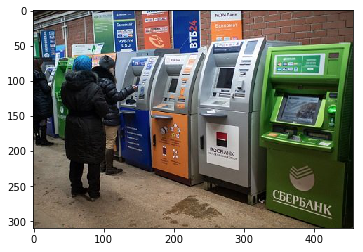

In [571]:
path_to_image = './pic1.jpg'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [573]:
flat_image_array = np.ravel(image_array)

In [583]:
flat_image_array[:100]

array([40, 40, 48, 46, 46, 54, 52, 51, 59, 53, 52, 60, 54, 53, 59, 58, 57,
       63, 59, 58, 63, 58, 56, 59, 60, 58, 61, 58, 56, 57, 54, 50, 51, 44,
       40, 39, 33, 29, 28, 27, 23, 22, 28, 24, 21, 30, 26, 23, 24, 11, 18,
       31, 18, 25, 35, 22, 29, 31, 20, 26, 25, 16, 19, 26, 17, 20, 32, 26,
       28, 37, 33, 32, 47, 46, 44, 61, 61, 59, 73, 74, 69, 81, 83, 78, 87,
       92, 86, 81, 86, 79, 65, 70, 63, 53, 60, 52, 37, 37, 29, 38], dtype=uint8)

In [581]:
# здесь выведите размер нового массива
print(np.shape(image_array))
print(np.shape(flat_image_array))
print(np.product(np.array(np.shape(image_array))))

(310, 456, 3)
(424080,)
424080
